In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df1 = pd.read_csv('cleaned_df-2', index_col = 0)

In [2]:
df1 = pd.read_csv('cleaned_df-2', index_col = 0)

In [3]:
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,reno,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,0,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,0,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,0,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,0,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500


In [4]:
mediandf = pd.read_csv('mediandf.csv', index_col = 0)

In [5]:
mergedDf = df1.merge(mediandf, left_index=True, right_index=True)

In [6]:
df1.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    103
98010    100
98024     80
98148     57
98039     44
Name: zipcode, Length: 70, dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21577 non-null  int64  
 1   price                    21577 non-null  float64
 2   bedrooms                 21577 non-null  int64  
 3   bathrooms                21577 non-null  float64
 4   sqft_living              21577 non-null  int64  
 5   sqft_lot                 21577 non-null  int64  
 6   floors                   21577 non-null  float64
 7   waterfront               21577 non-null  float64
 8   view                     21577 non-null  float64
 9   condition                21577 non-null  int64  
 10  grade                    21577 non-null  int64  
 11  sqft_above               21577 non-null  int64  
 12  sqft_basement            21577 non-null  float64
 13  yr_built                 21577 non-null  int64  
 14  yr_renovated          

In [8]:
#df1["bathbed"] = df1["bathrooms"] * df1["bedrooms"]

In [9]:
#dfdrop = mergedDf.drop('price',axis = 1)

In [10]:
df1 = mergedDf

In [11]:
dfdrop = df1.drop('id', axis = 1)

In [12]:
dfdrop = dfdrop.drop('season', axis = 1)

In [13]:
dfdrop = dfdrop.drop('zipcode', axis = 1)

In [14]:
dfdrop = dfdrop.drop('day', axis = 1)

In [15]:
dfdrop = dfdrop.drop('month', axis = 1)

In [16]:
dfdrop = dfdrop.drop('year', axis = 1)

In [17]:
dfdrop = dfdrop.drop('sqft_lot15', axis = 1)

In [18]:
dfdrop = dfdrop.drop('lat', axis = 1)

In [19]:
dfdrop = dfdrop.drop('long', axis = 1)

In [20]:
#dfdrop = dfdrop.drop('condition_div_grade', axis = 1)

In [21]:
dfdrop = dfdrop.drop('price_per_sqft', axis = 1)

In [22]:
#dfdrop = dfdrop.drop('condition', axis = 1)

In [23]:
#dfdrop = dfdrop.drop('yr_built', axis = 1)

In [24]:
dfdrop.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,sqft_living15,reno,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq,median_by_zip
price,1.000000,0.312065,0.519674,0.693781,0.092868,0.266271,0.235674,0.392937,0.039385,0.677931,...,0.310148,0.053060,0.115557,0.598729,0.115229,0.743376,-0.314446,0.695189,0.548383,0.395456
bedrooms,0.312065,1.000000,0.512997,0.579804,0.032095,0.177208,-0.010249,0.074913,0.026399,0.353874,...,0.296498,0.155469,0.016623,0.391291,0.016358,0.509445,-0.183878,0.488454,0.489630,0.148640
bathrooms,0.519674,0.512997,1.000000,0.751572,0.088059,0.504531,0.048544,0.178389,-0.127452,0.661677,...,0.270573,0.510311,0.044096,0.566808,0.043660,0.735229,-0.452308,0.677729,0.964875,0.294126
sqft_living,0.693781,0.579804,0.751572,1.000000,0.174841,0.356182,0.083427,0.273393,-0.060039,0.760679,...,0.421178,0.321776,0.045885,0.757739,0.045656,0.973659,-0.437714,0.946654,0.749997,0.356461
sqft_lot,0.092868,0.032095,0.088059,0.174841,1.000000,-0.005024,0.020647,0.074664,-0.008810,0.114454,...,0.014578,0.052843,0.004839,0.144587,0.004951,0.175544,-0.056806,0.186472,0.099947,0.095555
floors,0.266271,0.177208,0.504531,0.356182,-0.005024,1.000000,0.018708,0.026910,-0.264188,0.459444,...,-0.245888,0.489280,0.003457,0.279456,0.003373,0.378370,-0.442225,0.310540,0.463843,0.180131
waterfront,0.235674,-0.010249,0.048544,0.083427,0.020647,0.018708,1.000000,0.375378,0.015587,0.070694,...,0.072214,-0.026243,0.070701,0.074782,0.071068,0.090259,-0.020724,0.089572,0.055841,-0.000625
view,0.392937,0.074913,0.178389,0.273393,0.074664,0.026910,0.375378,1.000000,0.045512,0.242889,...,0.268706,-0.055685,0.088736,0.274744,0.088883,0.287935,-0.089467,0.279569,0.195096,0.012333
condition,0.039385,0.026399,-0.127452,-0.060039,-0.008810,-0.264188,0.015587,0.045512,1.000000,-0.147738,...,0.170461,-0.361479,-0.055850,-0.093534,-0.055425,-0.087327,0.828027,-0.060988,-0.127368,-0.057791
grade,0.677931,0.353874,0.661677,0.760679,0.114454,0.459444,0.070694,0.242889,-0.147738,1.000000,...,0.157866,0.449111,0.013571,0.711868,0.013207,0.851078,-0.645247,0.704065,0.636684,0.399007


In [25]:
dfdrop = dfdrop.drop('price', axis = 1)

In [26]:
X = dfdrop #want 2 dimensions of feature
y = mergedDf['price']
#defining training and test data with 72/25 split and random state of 42
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [27]:
# Replace missing values with the mean using simple imputer
imputer = SimpleImputer()
# Fit imputer to the indepedent variable using only the training data -- fit LEARNS the data so in this case it is 
#finding the mean
imputer.fit(X_train)
# Replace missing values in the training and test data with mean -- transform takes what fit learned and transforms
#the data with that information -- in this case replacing null values with the mean.
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [28]:
#Fit a LinearRegression model
baselinelinreg = LinearRegression()
baselinelinreg.fit(X_train, y_train)
#Check and interpret the intercept and coefficient
print(baselinelinreg.intercept_)
print(baselinelinreg.coef_)

6701767.792862494
[-1.18736742e+04 -1.08600262e+04 -2.81909873e+02 -2.45765899e-01
  6.69281572e+04  4.83681568e+05  5.14150771e+04  1.51782621e+05
 -6.30760350e+04  3.71505123e+00  6.18984102e+01 -3.24607690e+03
  2.72002269e+03  1.15519779e+01 -5.39034125e+06  5.44512958e+01
 -9.13970711e+05 -1.70047131e-02  1.22846755e+04  2.61705298e+00]


In [29]:
#Make predictions on both the training and testing data
train_preds = baselinelinreg.predict(X_train)
test_preds = baselinelinreg.predict(X_test)

In [30]:
#find root(here by raising to .5 power) mean squared error o training and test predictions
train_score = (mean_squared_error(y_train, train_preds))**.5
test_score = (mean_squared_error(y_test, test_preds))**.5
print('Basline Train score:', train_score)
print('Baseline Test score:', test_score)

Basline Train score: 187244.1526670635
Baseline Test score: 181403.03392964124


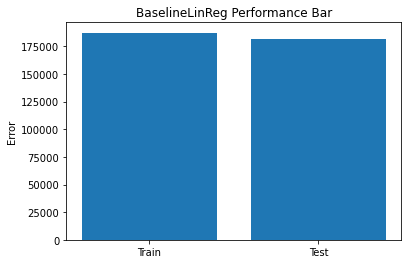

In [31]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('BaselineLinReg Performance Bar');

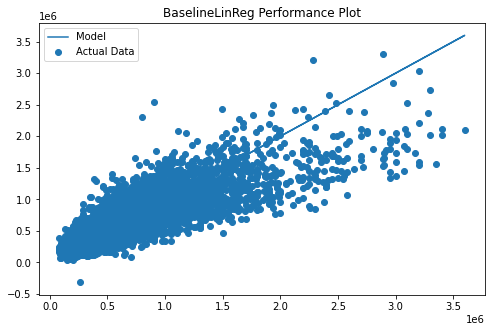

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_preds, label='Actual Data')
plt.plot(y_train, y_train, label='Model')
plt.title('BaselineLinReg Performance Plot')
plt.legend();

In [33]:
mediandf

,median_by_zip
0,60839.0
1,54561.0
2,90588.0
3,90625.0
4,145262.0
...,...
21592,81330.0
21593,58429.0
21594,62633.0
21595,102025.0


In [34]:
mergedDf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,price_per_sqft,year,day,month,season,sqft_living_times_grade,condition_div_grade,sqft_living_sq,bathrooms_sq,median_by_zip
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,188.050847,2014.0,13.0,10.0,fall,8260,0.428571,1392400,1.0000,60839.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,209.338521,2014.0,9.0,12.0,winter,17990,0.428571,6604900,5.0625,54561.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,233.766234,2015.0,25.0,2.0,winter,4620,0.500000,592900,1.0000,90588.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,308.163265,2014.0,9.0,12.0,winter,13720,0.714286,3841600,9.0000,90625.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,303.571429,2015.0,18.0,2.0,winter,13440,0.375000,2822400,4.0000,145262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,235.294118,2014.0,21.0,5.0,spring,12240,0.375000,2340900,6.2500,81330.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,173.160173,2015.0,23.0,2.0,winter,18480,0.375000,5336100,6.2500,58429.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,394.216667,2014.0,23.0,6.0,summer,7140,0.428571,1040400,0.5625,62633.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,250.000000,2015.0,16.0,1.0,winter,12800,0.375000,2560000,6.2500,102025.0


In [35]:
mergedDf.view.value_counts()

0.0    19479
2.0      954
3.0      507
1.0      329
4.0      308
Name: view, dtype: int64